<a href="https://colab.research.google.com/github/PraveenKalaivannan/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models


In [10]:
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.cifar10.load_data()

In [13]:
print(x_test.shape)

(10000, 32, 32, 3)


In [15]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [16]:

# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

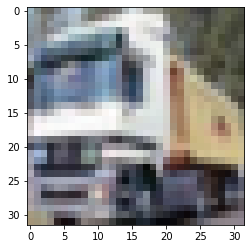

In [18]:
plt.imshow(x_train[1])

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## **ANN**

In [22]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 59s 37ms/step - loss: 1.8123 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6206 - accuracy: 0.4296
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5402 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4798 - accuracy: 0.4801
Epoch 5/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4297 - accuracy: 0.4980


In [24]:
from sklearn.metrics import accuracy_score
pre=ann.predict(x_test)
pred=np.argmax(pre,axis=1)
accuracy_score(pred,y_test)

313/313 [==============================] - 5s 16ms/step


0.4827

## **CNN**

In [25]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [26]:
result=cnn.predict(x_test)
res=np.argmax(result,axis=1)
accuracy_score(res,y_test)


313/313 [==============================] - 3s 9ms/step


0.1